In [44]:
import pandas as pd
import numpy as np
# import numpy as nps

In [45]:
%matplotlib inline

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.plotly as py
import plotly.offline as pyo
import plotly.graph_objs as go

pyo.init_notebook_mode(connected=True)

import cufflinks as cf

# import plotly.tools as tls
# tls.embed('https://plot.ly/~cufflinks/8')

In [47]:
df = pd.read_excel('Daten/Wohnungen/Leerwohnungen-Stadt-Zuerich.xlsx',
                   header=7).fillna(0)

In [48]:
df.head()

,Leerwohnungsbestand 2018,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Leerwohnungsziffer3,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Leerwohnungsbestand,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
NaN,Total,davon mit ... Zimmer(n),0.0,0.0,0.0,0,davon in …,0,2018.00,2017.00,...,2011.000000,2010.000,2017.0,2016.0,2015.0,2014.0,2013.0,2012,2011.0,2010.0
NaN,0,1,2.0,3.0,4.0,5 u.,EFH 1,Neu-,0.00,0.00,...,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
NaN,0,0,0.0,0.0,0.0,mehr,0,bauten 2,0.00,0.00,...,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
Stadt Zürich,447,32,95.0,173.0,107.0,40,7,87,0.20,0.21,...,0.059762,0.066,454.0,484.0,483.0,471.0,242.0,206,125.0,136.0
Kreis 1,25,4,6.0,5.0,7.0,3,0,0,0.65,0.42,...,0.078802,0.052,16.0,9.0,14.0,19.0,14.0,10,3.0,2.0


-------

Daten säubern – Rows für Header verbinden

In [49]:
df = pd.read_excel('Daten/Wohnungen/Leerwohnungen-Stadt-Zuerich.xlsx', header=7).replace('–', np.nan)
df.head()

,Leerwohnungsbestand 2018,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Leerwohnungsziffer3,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Leerwohnungsbestand,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
NaN,Total,davon mit ... Zimmer(n),NaN,NaN,NaN,NaN,davon in …,NaN,2018.00,2017.00,...,2011.000000,2010.000,2017.0,2016.0,2015.0,2014.0,2013.0,2012.0,2011.0,2010.0
NaN,NaN,1,2.0,3.0,4.0,5 u.,EFH 1,Neu-,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,mehr,NaN,bauten 2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stadt Zürich,447,32,95.0,173.0,107.0,40,7,87,0.20,0.21,...,0.059762,0.066,454.0,484.0,483.0,471.0,242.0,206.0,125.0,136.0
Kreis 1,25,4,6.0,5.0,7.0,3,0,0,0.65,0.42,...,0.078802,0.052,16.0,9.0,14.0,19.0,14.0,10.0,3.0,2.0


In [50]:
list1=list(df)

In [51]:
df = pd.read_excel('Daten/Wohnungen/Leerwohnungen-Stadt-Zuerich.xlsx', header=8).replace('–', np.nan)
df.head()

,Total,davon mit ... Zimmer(n),Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,davon in …,Unnamed: 7,2018,2017,...,2011,2010,2017.1,2016.1,2015.1,2014.1,2013.1,2012.1,2011.1,2010.1
NaN,NaN,1.0,2.0,3.0,4.0,5 u.,EFH 1,Neu-,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,mehr,NaN,bauten 2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stadt Zürich,447.0,32.0,95.0,173.0,107.0,40,7,87,0.20,0.21,...,0.059762,0.066,454.0,484.0,483.0,471.0,242.0,206.0,125.0,136.0
Kreis 1,25.0,4.0,6.0,5.0,7.0,3,0,0,0.65,0.42,...,0.078802,0.052,16.0,9.0,14.0,19.0,14.0,10.0,3.0,2.0
Rathaus,14.0,4.0,4.0,2.0,2.0,2,0,0,0.61,0.56,...,0.044228,0.087,13.0,3.0,6.0,12.0,9.0,6.0,1.0,2.0


In [52]:
list2=list(df)

In [53]:
list3 = []
for elem1, elem2 in zip(list1, list2):
    elem = elem1, elem2
    list3.append(elem)

In [54]:
df = pd.read_excel('Daten/Wohnungen/Leerwohnungen-Stadt-Zuerich.xlsx',index_col=None, header=7).replace('–', np.nan)

In [55]:
df.columns = list3

In [56]:
df.head()

,"(Leerwohnungsbestand 2018, Total)","(Unnamed: 1, davon mit ... Zimmer(n))","(Unnamed: 2, Unnamed: 2)","(Unnamed: 3, Unnamed: 3)","(Unnamed: 4, Unnamed: 4)","(Unnamed: 5, Unnamed: 5)","(Unnamed: 6, davon in …)","(Unnamed: 7, Unnamed: 7)","(Unnamed: 8, 2018)","(Leerwohnungsziffer3, 2017)",...,"(Unnamed: 15, 2011)","(Unnamed: 16, 2010)","(Unnamed: 17, 2017.1)","(Leerwohnungsbestand, 2016.1)","(Unnamed: 19, 2015.1)","(Unnamed: 20, 2014.1)","(Unnamed: 21, 2013.1)","(Unnamed: 22, 2012.1)","(Unnamed: 23, 2011.1)","(Unnamed: 24, 2010.1)"
NaN,Total,davon mit ... Zimmer(n),NaN,NaN,NaN,NaN,davon in …,NaN,2018.00,2017.00,...,2011.000000,2010.000,2017.0,2016.0,2015.0,2014.0,2013.0,2012.0,2011.0,2010.0
NaN,NaN,1,2.0,3.0,4.0,5 u.,EFH 1,Neu-,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,mehr,NaN,bauten 2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stadt Zürich,447,32,95.0,173.0,107.0,40,7,87,0.20,0.21,...,0.059762,0.066,454.0,484.0,483.0,471.0,242.0,206.0,125.0,136.0
Kreis 1,25,4,6.0,5.0,7.0,3,0,0,0.65,0.42,...,0.078802,0.052,16.0,9.0,14.0,19.0,14.0,10.0,3.0,2.0


In [57]:
df.index.name = 'Quartier'

In [58]:
df.reset_index(inplace=True)
df.head()

,Quartier,"(Leerwohnungsbestand 2018, Total)","(Unnamed: 1, davon mit ... Zimmer(n))","(Unnamed: 2, Unnamed: 2)","(Unnamed: 3, Unnamed: 3)","(Unnamed: 4, Unnamed: 4)","(Unnamed: 5, Unnamed: 5)","(Unnamed: 6, davon in …)","(Unnamed: 7, Unnamed: 7)","(Unnamed: 8, 2018)",...,"(Unnamed: 15, 2011)","(Unnamed: 16, 2010)","(Unnamed: 17, 2017.1)","(Leerwohnungsbestand, 2016.1)","(Unnamed: 19, 2015.1)","(Unnamed: 20, 2014.1)","(Unnamed: 21, 2013.1)","(Unnamed: 22, 2012.1)","(Unnamed: 23, 2011.1)","(Unnamed: 24, 2010.1)"
0,NaN,Total,davon mit ... Zimmer(n),NaN,NaN,NaN,NaN,davon in …,NaN,2018.00,...,2011.000000,2010.000,2017.0,2016.0,2015.0,2014.0,2013.0,2012.0,2011.0,2010.0
1,NaN,NaN,1,2.0,3.0,4.0,5 u.,EFH 1,Neu-,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,mehr,NaN,bauten 2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Stadt Zürich,447,32,95.0,173.0,107.0,40,7,87,0.20,...,0.059762,0.066,454.0,484.0,483.0,471.0,242.0,206.0,125.0,136.0
4,Kreis 1,25,4,6.0,5.0,7.0,3,0,0,0.65,...,0.078802,0.052,16.0,9.0,14.0,19.0,14.0,10.0,3.0,2.0


---------

Daten auswählen

In [59]:
df.drop(df.index[0:3], inplace=True)
df.head()

,Quartier,"(Leerwohnungsbestand 2018, Total)","(Unnamed: 1, davon mit ... Zimmer(n))","(Unnamed: 2, Unnamed: 2)","(Unnamed: 3, Unnamed: 3)","(Unnamed: 4, Unnamed: 4)","(Unnamed: 5, Unnamed: 5)","(Unnamed: 6, davon in …)","(Unnamed: 7, Unnamed: 7)","(Unnamed: 8, 2018)",...,"(Unnamed: 15, 2011)","(Unnamed: 16, 2010)","(Unnamed: 17, 2017.1)","(Leerwohnungsbestand, 2016.1)","(Unnamed: 19, 2015.1)","(Unnamed: 20, 2014.1)","(Unnamed: 21, 2013.1)","(Unnamed: 22, 2012.1)","(Unnamed: 23, 2011.1)","(Unnamed: 24, 2010.1)"
3,Stadt Zürich,447,32,95.0,173.0,107.0,40,7,87,0.20,...,0.059762,0.066,454.0,484.0,483.0,471.0,242.0,206.0,125.0,136.0
4,Kreis 1,25,4,6.0,5.0,7.0,3,0,0,0.65,...,0.078802,0.052,16.0,9.0,14.0,19.0,14.0,10.0,3.0,2.0
5,Rathaus,14,4,4.0,2.0,2.0,2,0,0,0.61,...,0.044228,0.087,13.0,3.0,6.0,12.0,9.0,6.0,1.0,2.0
6,Hochschulen,1,0,0.0,0.0,1.0,0,0,0,0.31,...,0.000000,0.000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7,Lindenhof,7,0,2.0,1.0,3.0,1,0,0,0.85,...,0.256082,0.000,2.0,4.0,5.0,5.0,2.0,3.0,2.0,0.0


In [60]:
df.fillna(0, inplace=True)
df.head()

,Quartier,"(Leerwohnungsbestand 2018, Total)","(Unnamed: 1, davon mit ... Zimmer(n))","(Unnamed: 2, Unnamed: 2)","(Unnamed: 3, Unnamed: 3)","(Unnamed: 4, Unnamed: 4)","(Unnamed: 5, Unnamed: 5)","(Unnamed: 6, davon in …)","(Unnamed: 7, Unnamed: 7)","(Unnamed: 8, 2018)",...,"(Unnamed: 15, 2011)","(Unnamed: 16, 2010)","(Unnamed: 17, 2017.1)","(Leerwohnungsbestand, 2016.1)","(Unnamed: 19, 2015.1)","(Unnamed: 20, 2014.1)","(Unnamed: 21, 2013.1)","(Unnamed: 22, 2012.1)","(Unnamed: 23, 2011.1)","(Unnamed: 24, 2010.1)"
3,Stadt Zürich,447,32,95.0,173.0,107.0,40,7,87,0.20,...,0.059762,0.066,454.0,484.0,483.0,471.0,242.0,206.0,125.0,136.0
4,Kreis 1,25,4,6.0,5.0,7.0,3,0,0,0.65,...,0.078802,0.052,16.0,9.0,14.0,19.0,14.0,10.0,3.0,2.0
5,Rathaus,14,4,4.0,2.0,2.0,2,0,0,0.61,...,0.044228,0.087,13.0,3.0,6.0,12.0,9.0,6.0,1.0,2.0
6,Hochschulen,1,0,0.0,0.0,1.0,0,0,0,0.31,...,0.000000,0.000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7,Lindenhof,7,0,2.0,1.0,3.0,1,0,0,0.85,...,0.256082,0.000,2.0,4.0,5.0,5.0,2.0,3.0,2.0,0.0


-------

Datenauswahl von 2010 bis 2018

In [61]:
df1 = df.iloc[0:47, [0,1,18,19,20,21,22,23,24,25]]

In [62]:
df1.head()

,Quartier,"(Leerwohnungsbestand 2018, Total)","(Unnamed: 17, 2017.1)","(Leerwohnungsbestand, 2016.1)","(Unnamed: 19, 2015.1)","(Unnamed: 20, 2014.1)","(Unnamed: 21, 2013.1)","(Unnamed: 22, 2012.1)","(Unnamed: 23, 2011.1)","(Unnamed: 24, 2010.1)"
3,Stadt Zürich,447,454.0,484.0,483.0,471.0,242.0,206.0,125.0,136.0
4,Kreis 1,25,16.0,9.0,14.0,19.0,14.0,10.0,3.0,2.0
5,Rathaus,14,13.0,3.0,6.0,12.0,9.0,6.0,1.0,2.0
6,Hochschulen,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7,Lindenhof,7,2.0,4.0,5.0,5.0,2.0,3.0,2.0,0.0


-------

Columns umbennen

In [63]:
df1.columns

Index([                           'Quartier',
       ('Leerwohnungsbestand 2018', 'Total'),
                   ('Unnamed: 17', '2017.1'),
           ('Leerwohnungsbestand', '2016.1'),
                   ('Unnamed: 19', '2015.1'),
                   ('Unnamed: 20', '2014.1'),
                   ('Unnamed: 21', '2013.1'),
                   ('Unnamed: 22', '2012.1'),
                   ('Unnamed: 23', '2011.1'),
                   ('Unnamed: 24', '2010.1')],
      dtype='object')

In [64]:
df1.columns = ['Quartier', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010']
df1.columns

Index(['Quartier', '2018', '2017', '2016', '2015', '2014', '2013', '2012',
       '2011', '2010'],
      dtype='object')

In [65]:
df1.head()

,Quartier,2018,2017,2016,2015,2014,2013,2012,2011,2010
3,Stadt Zürich,447,454.0,484.0,483.0,471.0,242.0,206.0,125.0,136.0
4,Kreis 1,25,16.0,9.0,14.0,19.0,14.0,10.0,3.0,2.0
5,Rathaus,14,13.0,3.0,6.0,12.0,9.0,6.0,1.0,2.0
6,Hochschulen,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7,Lindenhof,7,2.0,4.0,5.0,5.0,2.0,3.0,2.0,0.0


-------

Daten zu int konvertieren

In [66]:
df1.dtypes

Quartier     object
2018          int64
2017        float64
2016        float64
2015        float64
2014        float64
2013        float64
2012        float64
2011        float64
2010        float64
dtype: object

In [67]:
df1.to_excel('Daten/Leerwohnungen_df2.xlsx')

In [68]:
df2 = pd.read_excel('Daten/Leerwohnungen_df2.xlsx')

In [69]:
df2.dtypes

Quartier    object
2018         int64
2017         int64
2016         int64
2015         int64
2014         int64
2013         int64
2012         int64
2011         int64
2010         int64
dtype: object

In [70]:
df2.head()

,Quartier,2018,2017,2016,2015,2014,2013,2012,2011,2010
3,Stadt Zürich,447,454,484,483,471,242,206,125,136
4,Kreis 1,25,16,9,14,19,14,10,3,2
5,Rathaus,14,13,3,6,12,9,6,1,2
6,Hochschulen,1,0,0,0,1,1,0,0,0
7,Lindenhof,7,2,4,5,5,2,3,2,0


Daten sind soweit ausgewählt und gesäubert um weitere Selektionen zu machen.

**- df2 ist Referenz-Auswahl**






-------------

# Stadtkreise

### Leerwohnungen nach Stadtkreisen – 2010 bis 2018

In [71]:
df3 = df2.iloc[[1,6,10,14,18,21,24,29,33,36,39,43], :]

In [72]:
df3.columns

Index(['Quartier', '2018', '2017', '2016', '2015', '2014', '2013', '2012',
       '2011', '2010'],
      dtype='object')

In [73]:
df3

,Quartier,2018,2017,2016,2015,2014,2013,2012,2011,2010
4,Kreis 1,25,16,9,14,19,14,10,3,2
9,Kreis 2,55,49,84,40,31,29,12,8,13
13,Kreis 3,16,39,44,27,21,9,22,4,13
17,Kreis 4,33,62,69,100,21,11,31,5,4
21,Kreis 5,8,18,23,88,112,6,0,1,3
24,Kreis 6,31,25,39,28,18,22,11,9,10
27,Kreis 7,63,39,79,54,73,43,33,25,35
32,Kreis 8,28,23,17,23,31,19,14,11,6
36,Kreis 9,44,71,33,37,37,35,10,19,9
39,Kreis 10,48,26,33,15,27,22,13,15,13


---------

Darstellung als Kurvengrafik

In [74]:
df4 = df3.transpose()

In [75]:
df4.head()

,4,9,13,17,21,24,27,32,36,39,42,46
Quartier,Kreis 1,Kreis 2,Kreis 3,Kreis 4,Kreis 5,Kreis 6,Kreis 7,Kreis 8,Kreis 9,Kreis 10,Kreis 11,Kreis 12
2018,25,55,16,33,8,31,63,28,44,48,58,38
2017,16,49,39,62,18,25,39,23,71,26,70,16
2016,9,84,44,69,23,39,79,17,33,33,40,14
2015,14,40,27,100,88,28,54,23,37,15,39,18


In [76]:
df4.reset_index(inplace=True)
df4.head()

,index,4,9,13,17,21,24,27,32,36,39,42,46
0,Quartier,Kreis 1,Kreis 2,Kreis 3,Kreis 4,Kreis 5,Kreis 6,Kreis 7,Kreis 8,Kreis 9,Kreis 10,Kreis 11,Kreis 12
1,2018,25,55,16,33,8,31,63,28,44,48,58,38
2,2017,16,49,39,62,18,25,39,23,71,26,70,16
3,2016,9,84,44,69,23,39,79,17,33,33,40,14
4,2015,14,40,27,100,88,28,54,23,37,15,39,18


In [77]:
header = df4.iloc[0]
df4 = df4[1:]
df4.rename(columns = header, inplace=True)

In [78]:
df4.head()

,Quartier,Kreis 1,Kreis 2,Kreis 3,Kreis 4,Kreis 5,Kreis 6,Kreis 7,Kreis 8,Kreis 9,Kreis 10,Kreis 11,Kreis 12
1,2018,25,55,16,33,8,31,63,28,44,48,58,38
2,2017,16,49,39,62,18,25,39,23,71,26,70,16
3,2016,9,84,44,69,23,39,79,17,33,33,40,14
4,2015,14,40,27,100,88,28,54,23,37,15,39,18
5,2014,19,31,21,21,112,18,73,31,37,27,48,33


In [79]:
df4.columns

Index(['Quartier', 'Kreis 1', 'Kreis 2', 'Kreis 3', 'Kreis 4', 'Kreis 5',
       'Kreis 6', 'Kreis 7', 'Kreis 8', 'Kreis 9', 'Kreis 10', 'Kreis 11',
       'Kreis 12'],
      dtype='object')

------------

Konvertieren von object to int

In [80]:
df4.dtypes

Quartier    object
Kreis 1     object
Kreis 2     object
Kreis 3     object
Kreis 4     object
Kreis 5     object
Kreis 6     object
Kreis 7     object
Kreis 8     object
Kreis 9     object
Kreis 10    object
Kreis 11    object
Kreis 12    object
dtype: object

In [81]:
df4.to_excel('Daten/Leerwohnungen_df5.xlsx')

In [82]:
df5 = pd.read_excel('Daten/Leerwohnungen_df5.xlsx', header=0)

In [83]:
df5.dtypes

Quartier    int64
Kreis 1     int64
Kreis 2     int64
Kreis 3     int64
Kreis 4     int64
Kreis 5     int64
Kreis 6     int64
Kreis 7     int64
Kreis 8     int64
Kreis 9     int64
Kreis 10    int64
Kreis 11    int64
Kreis 12    int64
dtype: object

-----------

Columns umbennen

In [84]:
df5.columns = ['Jahr', 'Kreis 1', 'Kreis 2', 'Kreis 3', 'Kreis 4', 'Kreis 5', 'Kreis 6', 'Kreis 7', 'Kreis 8', 'Kreis 9', 'Kreis 10', 'Kreis 11', 'Kreis 12', ]

In [85]:
df5

,Jahr,Kreis 1,Kreis 2,Kreis 3,Kreis 4,Kreis 5,Kreis 6,Kreis 7,Kreis 8,Kreis 9,Kreis 10,Kreis 11,Kreis 12
1,2018,25,55,16,33,8,31,63,28,44,48,58,38
2,2017,16,49,39,62,18,25,39,23,71,26,70,16
3,2016,9,84,44,69,23,39,79,17,33,33,40,14
4,2015,14,40,27,100,88,28,54,23,37,15,39,18
5,2014,19,31,21,21,112,18,73,31,37,27,48,33
6,2013,14,29,9,11,6,22,43,19,35,22,30,2
7,2012,10,12,22,31,0,11,33,14,10,13,46,4
8,2011,3,8,4,5,1,9,25,11,19,15,22,3
9,2010,2,13,13,4,3,10,35,6,9,13,25,3


---------

Darstellung als Kurvengrafik mit Plotly

In [108]:
trace1 = go.Scatter(x=df5.Jahr, y=df5['Kreis 1'], 
                    name="Kreis 1", 
                    mode="lines+markers")  
# mode can be 'markers', 'lines+markers', 'lines'

trace2 = go.Scatter(x=df5.Jahr, y=df5['Kreis 2'], 
                    name="Kreis 2", 
                    mode="lines+markers")  


trace3 = go.Scatter(x=df5.Jahr, y=df5['Kreis 3'], 
                    name="Kreis 3", 
                    mode="lines+markers")  


trace4 = go.Scatter(x=df5.Jahr, y=df5['Kreis 4'], 
                    name="Kreis 4", 
                    mode="lines+markers")  


trace5 = go.Scatter(x=df5.Jahr, y=df5['Kreis 5'], 
                    name="Kreis 5", 
                    mode="lines+markers")  


trace6 = go.Scatter(x=df5.Jahr, y=df5['Kreis 6'], 
                    name="Kreis 6", 
                    mode="lines+markers")  


trace7 = go.Scatter(x=df5.Jahr, y=df5['Kreis 7'], 
                    name="Kreis 7", 
                    mode="lines+markers")  


trace8 = go.Scatter(x=df5.Jahr, y=df5['Kreis 8'], 
                    name="Kreis 8", 
                    mode="lines+markers")  


trace9 = go.Scatter(x=df5.Jahr, y=df5['Kreis 9'], 
                    name="Kreis 9", 
                    mode="lines+markers")  


trace10 = go.Scatter(x=df5.Jahr, y=df5['Kreis 10'], 
                    name="Kreis 10", 
                    mode="lines+markers")  


trace11 = go.Scatter(x=df5.Jahr, y=df5['Kreis 11'], 
                    name="Kreis 11", 
                    mode="lines+markers")  


trace12 = go.Scatter(x=df5.Jahr, y=df5['Kreis 12'], 
                    name="Kreis 12", 
                    mode="lines+markers")  

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10, trace11, trace12]

mylayout = go.Layout(
    title="Leerwohnungen Stadt Zürich nach Stadtkreisen – 2010 bis 2018"
)

fig = go.Figure(data=data, layout=mylayout)
pyo.iplot(fig, filename='hover-chart-basic')

------------

Darstellung als Kurvengrafik mit matplotlib

In [87]:
df5.head(2)

,Jahr,Kreis 1,Kreis 2,Kreis 3,Kreis 4,Kreis 5,Kreis 6,Kreis 7,Kreis 8,Kreis 9,Kreis 10,Kreis 11,Kreis 12
1,2018,25,55,16,33,8,31,63,28,44,48,58,38
2,2017,16,49,39,62,18,25,39,23,71,26,70,16


In [88]:
df5.set_index('Jahr').head(2)

,Kreis 1,Kreis 2,Kreis 3,Kreis 4,Kreis 5,Kreis 6,Kreis 7,Kreis 8,Kreis 9,Kreis 10,Kreis 11,Kreis 12
Jahr,,,,,,,,,,,,
2018,25,55,16,33,8,31,63,28,44,48,58,38
2017,16,49,39,62,18,25,39,23,71,26,70,16


In [89]:
df6 = df5.set_index('Jahr')

In [90]:
df6

,Kreis 1,Kreis 2,Kreis 3,Kreis 4,Kreis 5,Kreis 6,Kreis 7,Kreis 8,Kreis 9,Kreis 10,Kreis 11,Kreis 12
Jahr,,,,,,,,,,,,
2018,25,55,16,33,8,31,63,28,44,48,58,38
2017,16,49,39,62,18,25,39,23,71,26,70,16
2016,9,84,44,69,23,39,79,17,33,33,40,14
2015,14,40,27,100,88,28,54,23,37,15,39,18
2014,19,31,21,21,112,18,73,31,37,27,48,33
2013,14,29,9,11,6,22,43,19,35,22,30,2
2012,10,12,22,31,0,11,33,14,10,13,46,4
2011,3,8,4,5,1,9,25,11,19,15,22,3
2010,2,13,13,4,3,10,35,6,9,13,25,3


In [91]:
df6.columns

Index(['Kreis 1', 'Kreis 2', 'Kreis 3', 'Kreis 4', 'Kreis 5', 'Kreis 6',
       'Kreis 7', 'Kreis 8', 'Kreis 9', 'Kreis 10', 'Kreis 11', 'Kreis 12'],
      dtype='object')

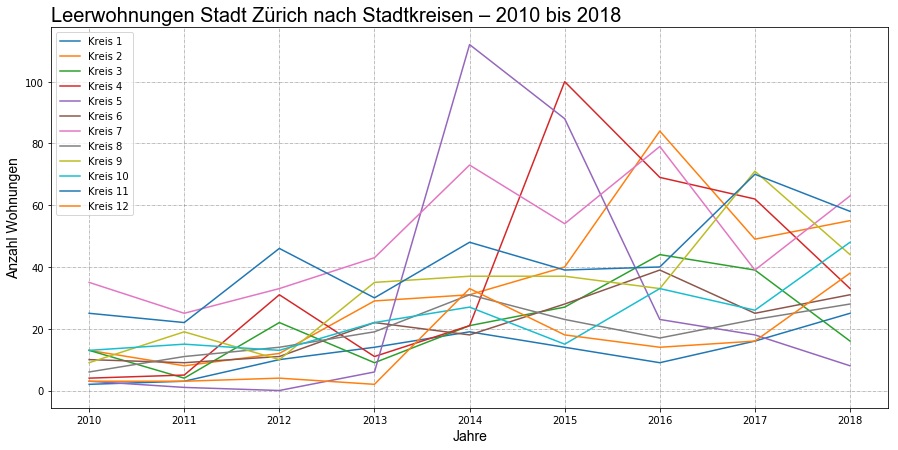

In [107]:
fig, ax = plt.subplots()
df6.plot(kind='line', figsize=(15,7), ax=ax)

ax.grid(which='major', linestyle='-.', linewidth='0.5', color='grey')
ax.set_axisbelow(True)

title_font = {'fontsize': 20, 'fontweight': 'normal', 'fontname': 'Arial'}
ax.set_title('Leerwohnungen Stadt Zürich nach Stadtkreisen – 2010 bis 2018', fontdict=title_font, loc='left')

# - Achsenbeschriftungen
label_font = {'fontsize': 14, 'fontweight': 'normal', 'fontname': 'Arial'}
ax.set_ylabel("Anzahl Wohnungen", fontdict=label_font)
ax.set_xlabel("Jahre", fontdict=label_font)
ax.yaxis.set_label_position('left')

-----------

Darstellung als Balkengrafik mit Plotly

In [93]:
df7 = df2.iloc[[1,6,10,14,18,21,24,29,33,36,39,43], :]

In [94]:
df7.head()

,Quartier,2018,2017,2016,2015,2014,2013,2012,2011,2010
4,Kreis 1,25,16,9,14,19,14,10,3,2
9,Kreis 2,55,49,84,40,31,29,12,8,13
13,Kreis 3,16,39,44,27,21,9,22,4,13
17,Kreis 4,33,62,69,100,21,11,31,5,4
21,Kreis 5,8,18,23,88,112,6,0,1,3


In [110]:
trace1 = go.Bar(
    x=df7['Quartier'],  # NOC stands for National Olympic Committee
    y=df7['2018'],
    name = '2018',
    marker=dict(color='#FFD700') # set the marker color to gold
)
trace2 = go.Bar(
    x=df7['Quartier'],
    y=df7['2017'],
    name='2017',
    marker=dict(color='#9EA0A1') # set the marker color to silver
)
trace3 = go.Bar(
    x=df7['Quartier'],
    y=df7['2016'],
    name='2016',
    marker=dict(color='#9EA0A1') # set the marker color to silver
)
trace4 = go.Bar(
    x=df7['Quartier'],
    y=df7['2015'],
    name='2015',
    marker=dict(color='#9EA0A1') # set the marker color to silver
)
trace5 = go.Bar(
    x=df7['Quartier'],
    y=df7['2014'],
    name='2014',
    marker=dict(color='#9EA0A1') # set the marker color to silver
)
trace6 = go.Bar(
    x=df7['Quartier'],
    y=df7['2013'],
    name='2013',
    marker=dict(color='#9EA0A1') # set the marker color to silver
)
trace7 = go.Bar(
    x=df7['Quartier'],
    y=df7['2012'],
    name='2012',
    marker=dict(color='#9EA0A1') # set the marker color to silver
)
trace8 = go.Bar(
    x=df7['Quartier'],
    y=df7['2013'],
    name='2013',
    marker=dict(color='#9EA0A1') # set the marker color to silver
)
trace9 = go.Bar(
    x=df7['Quartier'],
    y=df7['2012'],
    name='2012',
    marker=dict(color='#9EA0A1') # set the marker color to silver
)
trace10 = go.Bar(
    x=df7['Quartier'],
    y=df7['2011'],
    name='2011',
    marker=dict(color='#9EA0A1') # set the marker color to silver
)
trace11 = go.Bar(
    x=df7['Quartier'],
    y=df7['2010'],
    name='2010',
    marker=dict(color='#9EA0A1') # set the marker color to silver
)

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10, trace11]
layout = go.Layout(
    title='Leer stehende Wohnungen nach Stadtkreisen – 2010 bis 2018',
    xaxis=dict(
        autorange='reversed'
    ),
#     autosize=False,
#     width=600,
#     height=600,
    bargroupgap=0.1,
    bargap=0.2,
)
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig, filename='bar2.html')

----------------

### Leerstehende Wohnungen nach Stadtkreisen – 2018

In [96]:
df8 = df2.iloc[[1,6,10,14,18,21,24,29,33,36,39,43], 0:2]

In [97]:
df8.head()

,Quartier,2018
4,Kreis 1,25
9,Kreis 2,55
13,Kreis 3,16
17,Kreis 4,33
21,Kreis 5,8


In [98]:
df8.columns

Index(['Quartier', '2018'], dtype='object')

In [119]:
trace1 = go.Bar(
    x=df8['Quartier'],  # NOC stands for National Olympic Committee
    y=df8['2018'],
    name = '2018',
    marker=dict(color='#FFD700') # set the marker color to gold
)

data = [trace1]

layout = go.Layout(
    title='Leerstehende Wohnungen nach Stadtkreisen – 2018',
    font=dict(family='Arial, sans-serif', size=14, color='#7f7f7f'),
    autosize=False,
    width=900,
    height=600,
    bargroupgap=0.1,
    bargap=0.2,

    xaxis=dict(
        title='Stadtkreise',
        titlefont=dict(family='Arial, sans-serif', size=12, color='#7f7f7f'),
        tickwidth=1,
        ticklen=10,
        automargin=True,
        autorange='reversed',

    ),
    
    yaxis=dict(
        title='Anzahl Wohnungen',
        titlefont=dict(family='Arial, sans-serif', size=12, color='#7f7f7f'),
        rangemode='tozero',
        nticks=8,
        exponentformat='none',
        tickwidth=1,
        ticklen=10,
        automargin=True
    )
)    

fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig, filename='bar2.html')

----------

# Stadt Zürich

### Leerstehende Wohnungen Stadt Zürich – 2010 bis 2018

--------------

Balkengrafik mit Plotly

In [100]:
df21 = df2.iloc[[0], :]

In [101]:
df21

,Quartier,2018,2017,2016,2015,2014,2013,2012,2011,2010
3,Stadt Zürich,447,454,484,483,471,242,206,125,136


In [123]:
df21.index

Int64Index([3], dtype='int64')

In [132]:
data = [
    go.Bar(
        x=df21['Quartier'], # assign x as the dataframe column 'x'
        y=df21(['2018'], ['2017'])
    )
]

layout = go.Layout(
    title='Leerstehende Wohnungen Stadt Zürich – 2010 bis 2018',
    font=dict(family='Arial, sans-serif', size=14, color='#7f7f7f'),
    autosize=False,
    width=900,
    height=600,
    bargroupgap=0.1,
    bargap=0.2,

    xaxis=dict(
        title='Stadt Zürich',
        titlefont=dict(family='Arial, sans-serif', size=12, color='#7f7f7f'),
        tickwidth=1,
        ticklen=10,
        automargin=True,
        autorange='reversed',

    ),
    
    yaxis=dict(
        title='Anzahl Wohnungen',
        titlefont=dict(family='Arial, sans-serif', size=12, color='#7f7f7f'),
        rangemode='tozero',
        nticks=8,
        exponentformat='none',
        tickwidth=1,
        ticklen=10,
        automargin=True
    )
)    
    
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig, filename='bar2.html')

TypeError: 'DataFrame' object is not callable

In [102]:
df21.columns

Index(['Quartier', '2018', '2017', '2016', '2015', '2014', '2013', '2012',
       '2011', '2010'],
      dtype='object')

In [121]:
trace1 = go.Bar(
    x=df21['Quartier'],
    y=df21['2018'],
    name='2018',
    marker=dict(color='#FFD700') # set the marker color to silver
)
trace2 = go.Bar(
    x=df21['Quartier'],
    y=df21['2017'],
    name='2017',
    marker=dict(color='#9EA0A1') # set the marker color to silver
)
trace3 = go.Bar(
    x=df21['Quartier'],
    y=df21['2016'],
    name='2016',
    marker=dict(color='#9EA0A1') # set the marker color to silver
)
trace4 = go.Bar(
    x=df21['Quartier'],
    y=df21['2015'],
    name='2015',
    marker=dict(color='#9EA0A1') # set the marker color to silver
)
trace5 = go.Bar(
    x=df21['Quartier'],
    y=df21['2014'],
    name='2014',
    marker=dict(color='#9EA0A1') # set the marker color to silver
)
trace6 = go.Bar(
    x=df21['Quartier'],
    y=df21['2013'],
    name='2013',
    marker=dict(color='#9EA0A1') # set the marker color to silver
)
trace7 = go.Bar(
    x=df21['Quartier'],
    y=df21['2012'],
    name='2012',
    marker=dict(color='#9EA0A1') # set the marker color to silver
)
trace8 = go.Bar(
    x=df21['Quartier'],
    y=df21['2011'],
    name='2011',
    marker=dict(color='#9EA0A1') # set the marker color to silver
)
trace9 = go.Bar(
    x=df21['Quartier'],
    y=df21['2010'],
    name='2010',
    marker=dict(color='#9EA0A1') # set the marker color to silver
)

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9]

layout = go.Layout(
    title='Leerstehende Wohnungen Stadt Zürich – 2010 bis 2018',
    font=dict(family='Arial, sans-serif', size=14, color='#7f7f7f'),
    autosize=False,
    width=900,
    height=600,
    bargroupgap=0.1,
    bargap=0.2,

    xaxis=dict(
        title='Stadt Zürich',
        titlefont=dict(family='Arial, sans-serif', size=12, color='#7f7f7f'),
        tickwidth=1,
        ticklen=10,
        automargin=True,
        autorange='reversed',

    ),
    
    yaxis=dict(
        title='Anzahl Wohnungen',
        titlefont=dict(family='Arial, sans-serif', size=12, color='#7f7f7f'),
        rangemode='tozero',
        nticks=8,
        exponentformat='none',
        tickwidth=1,
        ticklen=10,
        automargin=True
    )
)    
    
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig, filename='bar2.html')

--------

Balkengrafik mit matplotlib

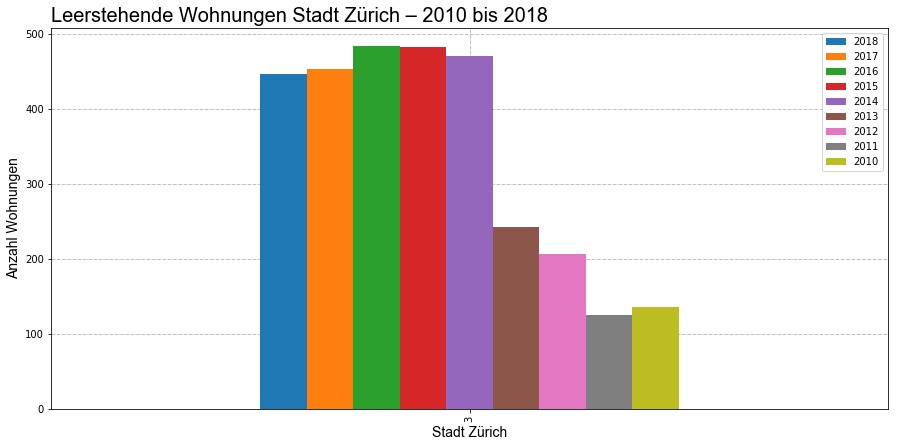

In [104]:
fig, ax = plt.subplots()    
df21.plot(kind='bar', figsize=(15,7), ax=ax)

ax.grid(which='major', linestyle='-.', linewidth='0.5', color='grey')
ax.set_axisbelow(True)

title_font = {'fontsize': 20, 'fontweight': 'normal', 'fontname': 'Arial'}
ax.set_title('Leerstehende Wohnungen Stadt Zürich – 2010 bis 2018', fontdict=title_font, loc='left')

# - Achsenbeschriftungen
label_font = {'fontsize': 14, 'fontweight': 'normal', 'fontname': 'Arial'}
ax.set_ylabel("Anzahl Wohnungen", fontdict=label_font)
ax.set_xlabel("Stadt Zürich", fontdict=label_font)
ax.yaxis.set_label_position('left')

------------